###### 2/ La prédiction du sexe de 166 semble difficile (sujet clef) toutefois Ameline a créé un fichier qui reprend cette fois-ci le type d’inhumation et l’arrangement, puisqu’ils ne présentent ni l’un ni l’autre une corrélation avec le sexe. En revanche, elle a supprimé la période puisque seuls les adultes ont un sexe de défini et qu’ils sont tous dans le secteur nord, donc dépendant de la période. On a donc 19 femmes et 8 hommes. Fichier : Egypte_sex_prediction.csv

## Pre-process the data

In [124]:
# import des bibliothèques Python utiles:
import numpy as np
import matplotlib.pyplot as plt
import random
# pour les "widgets" Jupyter permettant de régler les valeurs de variables 
import pandas as pd
#sklearn 
import sklearn
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline 
rcParams["figure.figsize"] =10,5

In [125]:
dataEgypt_17 = pd.read_csv("Egypte_sex_prediction.csv", sep=';',decimal=',')

In [126]:
dataEgypt_17.columns.values.tolist()

['Sepult',
 'Sex',
 'classe_age',
 'Type_inhumation',
 'Arrangement',
 'Position_corps',
 'Orientation_tete',
 'Orientation_Face',
 'Position_mains',
 'Nb_actes',
 'Mobilier',
 'Nb_Mobilier',
 'mob_tete',
 'mob_membre_inf',
 'mob_thorax',
 'mob_dos',
 'mob_devant_corps',
 'mob_contre_jarre',
 'mob_dans_jarre',
 'mob_exterieur_coffre',
 'mob_dans_coffre',
 'mob_contre_paroi',
 'mob_dans_remplissage',
 'Signalisation',
 'pelle ',
 'Ornement ',
 'Nb_Ornement',
 'orn_Porte',
 'orn_Nonporte',
 'Coquillage',
 'Aspatharia_unio',
 'Perles',
 'Fard',
 'Outils',
 'Prosterne',
 'Decoupe']

## Data encoding

In [127]:
Cols_=['classe_age','Type_inhumation','Position_corps','Orientation_tete','Orientation_Face','Position_mains']

In [128]:
from sklearn.preprocessing import OneHotEncoder

def encoding_data(dataframe, cols):
    

    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')


    #perform one-hot encoding on 'the following' columns 

    encoder_df = pd.DataFrame(encoder.fit_transform(dataframe[cols]).toarray())

    encoder_df.columns = encoder.get_feature_names(cols)


    #merge one-hot encoded columns back with original DataFrame
    data_encoded = dataframe.join(encoder_df)
    
    return data_encoded

In [129]:
data_encoded_Egypt_17=encoding_data(dataEgypt_17, Cols_)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [130]:
data_encoded_Egypt_17.head()

,Sepult,Sex,classe_age,Type_inhumation,Arrangement,Position_corps,Orientation_tete,Orientation_Face,Position_mains,Nb_actes,...,Orientation_Face_SO,Orientation_Face_Sol,Orientation_Face_ciel,Orientation_Face_sol,Position_mains_Jambes,Position_mains_asymetrique_jambe_tete,Position_mains_asymetrique_jambe_thorax,Position_mains_asymetrique_thorax_tete,Position_mains_tete,Position_mains_thorax
0,166,Indet,10_15,Coffre,In situ,G,S,SO,thorax,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,168,Indet,10_15,fosse simple,Hypercontraction,D,S,E,asymetrique_jambe_tete,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,554,Indet,10_15,fosse simple,Hypercontraction,G,S,Sol,tete,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,843,Indet,10_15,Coffre,Hypercontraction,G,SE,NO,asymetrique_thorax_tete,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,845,Indet,10_15,Pot,In situ,Assis,O,Sol,asymetrique_thorax_tete,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [131]:
data_encoded_Egypt_17.columns.values.tolist()

['Sepult',
 'Sex',
 'classe_age',
 'Type_inhumation',
 'Arrangement',
 'Position_corps',
 'Orientation_tete',
 'Orientation_Face',
 'Position_mains',
 'Nb_actes',
 'Mobilier',
 'Nb_Mobilier',
 'mob_tete',
 'mob_membre_inf',
 'mob_thorax',
 'mob_dos',
 'mob_devant_corps',
 'mob_contre_jarre',
 'mob_dans_jarre',
 'mob_exterieur_coffre',
 'mob_dans_coffre',
 'mob_contre_paroi',
 'mob_dans_remplissage',
 'Signalisation',
 'pelle ',
 'Ornement ',
 'Nb_Ornement',
 'orn_Porte',
 'orn_Nonporte',
 'Coquillage',
 'Aspatharia_unio',
 'Perles',
 'Fard',
 'Outils',
 'Prosterne',
 'Decoupe',
 'classe_age_0_1',
 'classe_age_10_15',
 'classe_age_15_19',
 'classe_age_1_5',
 'classe_age_5_10',
 'classe_age_>19',
 'Type_inhumation_Coffre',
 'Type_inhumation_Pot',
 'Type_inhumation_fosse simple',
 'Position_corps_Agenouille',
 'Position_corps_Assis',
 'Position_corps_D',
 'Position_corps_Dos',
 'Position_corps_G',
 'Position_corps_Ventre',
 'Orientation_tete_E',
 'Orientation_tete_N',
 'Orientation_tete_N

In [132]:
cols_to_norm=['Nb_actes',
 'Mobilier',
 'Nb_Mobilier',
 'mob_tete',
 'mob_membre_inf',
 'mob_thorax',
 'mob_dos',
 'mob_devant_corps',
 'mob_contre_jarre',
 'mob_dans_jarre',
 'mob_exterieur_coffre',
 'mob_dans_coffre',
 'mob_contre_paroi',
 'mob_dans_remplissage',
 'Signalisation',
 'pelle ',
 'Ornement ',
 'Nb_Ornement',
 'orn_Porte',
 'orn_Nonporte',
 'Coquillage',
 'Aspatharia_unio',
 'Perles',
 'Fard',
 'Outils',
 'Prosterne',
 'Decoupe',
 'classe_age_0_1',
 'classe_age_10_15',
 'classe_age_15_19',
 'classe_age_1_5',
 'classe_age_5_10',
 'classe_age_>19',
 'Type_inhumation_Coffre',
 'Type_inhumation_Pot',
 'Type_inhumation_fosse simple',
 'Position_corps_Agenouille',
 'Position_corps_Assis',
 'Position_corps_D',
 'Position_corps_Dos',
 'Position_corps_G',
 'Position_corps_Ventre',
 'Orientation_tete_E',
 'Orientation_tete_N',
 'Orientation_tete_NE',
 'Orientation_tete_NO',
 'Orientation_tete_O',
 'Orientation_tete_S',
 'Orientation_tete_SE',
 'Orientation_tete_SO',
 'Orientation_Face_Ciel',
 'Orientation_Face_E',
 'Orientation_Face_N',
 'Orientation_Face_NE',
 'Orientation_Face_NO',
 'Orientation_Face_O',
 'Orientation_Face_S',
 'Orientation_Face_SE',
 'Orientation_Face_SO',
 'Orientation_Face_Sol',
 'Orientation_Face_ciel',
 'Orientation_Face_sol',
 'Position_mains_Jambes',
 'Position_mains_asymetrique_jambe_tete ',
 'Position_mains_asymetrique_jambe_thorax',
 'Position_mains_asymetrique_thorax_tete ',
 'Position_mains_tete',
 'Position_mains_thorax']

In [133]:
#normalize the data before start working with it
#for that we will use the StandardScaler normalizer de from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
data_encoded_Egypt_17[cols_to_norm] = MinMaxScaler().fit_transform(data_encoded_Egypt_17[cols_to_norm])

In [134]:
data_encoded_Egypt_17['Sex'].unique()

array(['Indet', 'F', 'M'], dtype=object)

In [135]:
data_encoded_Egypt_17['Sex'].replace({'M':0, 'F':1,'IIIA2':2}, inplace=True)

### Cross Validation Using Leave one Out method¶

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import cross_val_score

In [137]:
cols_features=['Sex','Nb_actes',
 'Mobilier',
 'Nb_Mobilier',
 'mob_tete',
 'mob_membre_inf',
 'mob_thorax',
 'mob_dos',
 'mob_devant_corps',
 'mob_contre_jarre',
 'mob_dans_jarre',
 'mob_exterieur_coffre',
 'mob_dans_coffre',
 'mob_contre_paroi',
 'mob_dans_remplissage',
 'Signalisation',
 'pelle ',
 'Ornement ',
 'Nb_Ornement',
 'orn_Porte',
 'orn_Nonporte',
 'Coquillage',
 'Aspatharia_unio',
 'Perles',
 'Fard',
 'Outils',
 'Prosterne',
 'Decoupe',
 'classe_age_0_1',
 'classe_age_10_15',
 'classe_age_15_19',
 'classe_age_1_5',
 'classe_age_5_10',
 'classe_age_>19',
 'Type_inhumation_Coffre',
 'Type_inhumation_Pot',
 'Type_inhumation_fosse simple',
 'Position_corps_Agenouille',
 'Position_corps_Assis',
 'Position_corps_D',
 'Position_corps_Dos',
 'Position_corps_G',
 'Position_corps_Ventre',
 'Orientation_tete_E',
 'Orientation_tete_N',
 'Orientation_tete_NE',
 'Orientation_tete_NO',
 'Orientation_tete_O',
 'Orientation_tete_S',
 'Orientation_tete_SE',
 'Orientation_tete_SO',
 'Orientation_Face_Ciel',
 'Orientation_Face_E',
 'Orientation_Face_N',
 'Orientation_Face_NE',
 'Orientation_Face_NO',
 'Orientation_Face_O',
 'Orientation_Face_S',
 'Orientation_Face_SE',
 'Orientation_Face_SO',
 'Orientation_Face_Sol',
 'Orientation_Face_ciel',
 'Orientation_Face_sol',
 'Position_mains_Jambes',
 'Position_mains_asymetrique_jambe_tete ',
 'Position_mains_asymetrique_jambe_thorax',
 'Position_mains_asymetrique_thorax_tete ',
 'Position_mains_tete',
 'Position_mains_thorax']

In [138]:
data_=data_encoded_Egypt_17.loc[(data_encoded_Egypt_17['Sex']==0) | (data_encoded_Egypt_17['Sex']==1)]
data__=data_[cols_features]
# Separate the target variable and the features
X = data__.drop('Sex', axis=1)
y = data__['Sex']
y=y.astype('int')


In [139]:
data_

,Sepult,Sex,classe_age,Type_inhumation,Arrangement,Position_corps,Orientation_tete,Orientation_Face,Position_mains,Nb_actes,...,Orientation_Face_SO,Orientation_Face_Sol,Orientation_Face_ciel,Orientation_Face_sol,Position_mains_Jambes,Position_mains_asymetrique_jambe_tete,Position_mains_asymetrique_jambe_thorax,Position_mains_asymetrique_thorax_tete,Position_mains_tete,Position_mains_thorax
200,161,1,>19,Coffre,In situ,G,S,SO,tete,0.4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
201,164,1,>19,Coffre,Hypercontraction,G,S,O,tete,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
202,447,1,>19,Coffre,Hypercontraction,G,SE,Sol,tete,0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
203,452,1,>19,fosse simple,Hypercontraction,G,S,O,tete,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
204,454,1,>19,fosse simple,In situ,G,S,SO,tete,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
205,469,1,>19,fosse simple,In situ,D,S,N,asymetrique_jambe_thorax,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
206,471,1,>19,fosse simple,Hypercontraction,Dos,N,SE,asymetrique_jambe_thorax,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
207,473,1,>19,Coffre,In situ,D,NO,SO,asymetrique_thorax_tete,0.3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
208,488,1,>19,fosse simple,Hypercontraction,Assis,SO,Sol,asymetrique_jambe_thorax,0.1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
209,750,1,>19,fosse simple,Hypercontraction,G,S,NO,tete,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Random Forest Train and Test : Leave One Out

In [140]:
cols=['Sepult','Sex']
#define cross-validation method to use
loo = LeaveOneOut()
# initialize empty arrays to store predictions and actual values
y_true = []
y_pred = []
Df_predictions_RF=pd.DataFrame()
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #Create the Model 
    clf=RandomForestClassifier(n_estimators= 200,max_depth=5,min_samples_split=2,min_samples_leaf=1, random_state=42)
    clf.fit(X_train, y_train)
    # make a prediction on the test fold
    individu=data_.iloc[test_index]
    individu=individu[cols]
    y_pred.append(clf.predict(X_test))
    y_true.append(y_test)
    individu['predictions']=clf.predict(X_test).tolist()
    Df_predictions_RF=pd.concat([Df_predictions_RF,individu],ignore_index=True)

# convert the lists to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# print the predictions and actual values for each test fold
for i in range(len(y_pred)):
    print(f"Fold {i+1} - Prediction: {y_pred[i]}, Actual: {y_true[i]}")

Fold 1 - Prediction: [1], Actual: [1]
Fold 2 - Prediction: [1], Actual: [1]
Fold 3 - Prediction: [0], Actual: [1]
Fold 4 - Prediction: [1], Actual: [1]
Fold 5 - Prediction: [1], Actual: [1]
Fold 6 - Prediction: [1], Actual: [1]
Fold 7 - Prediction: [1], Actual: [1]
Fold 8 - Prediction: [1], Actual: [1]
Fold 9 - Prediction: [1], Actual: [1]
Fold 10 - Prediction: [1], Actual: [1]
Fold 11 - Prediction: [1], Actual: [1]
Fold 12 - Prediction: [1], Actual: [1]
Fold 13 - Prediction: [0], Actual: [1]
Fold 14 - Prediction: [1], Actual: [1]
Fold 15 - Prediction: [1], Actual: [1]
Fold 16 - Prediction: [1], Actual: [1]
Fold 17 - Prediction: [1], Actual: [1]
Fold 18 - Prediction: [1], Actual: [1]
Fold 19 - Prediction: [1], Actual: [1]
Fold 20 - Prediction: [1], Actual: [0]
Fold 21 - Prediction: [1], Actual: [0]
Fold 22 - Prediction: [1], Actual: [0]
Fold 23 - Prediction: [1], Actual: [0]
Fold 24 - Prediction: [1], Actual: [0]
Fold 25 - Prediction: [1], Actual: [0]
Fold 26 - Prediction: [1], Actual:

In [141]:
print(Df_predictions_RF)
Df_predictions_RF['Sex']=Df_predictions_RF['Sex'].astype('int')
accuracy = accuracy_score(Df_predictions_RF['Sex'], Df_predictions_RF['predictions'])
print("total accuracy",accuracy*100)
for i in range (2): 
    df=Df_predictions_RF.loc[Df_predictions_RF['Sex']==i]
    df_p=df.loc[df['predictions']==i]
    acc=(len(df_p)/len(df))*100
    print(f'for the class label ', {i})
    print(f'Acuracy is ', {acc})

   Sepult Sex  predictions
0     161   1            1
1     164   1            1
2     447   1            0
3     452   1            1
4     454   1            1
5     469   1            1
6     471   1            1
7     473   1            1
8     488   1            1
9     750   1            1
10    833   1            1
11    837   1            1
12    850   1            0
13    868   1            1
14    873   1            1
15    874   1            1
16    876   1            1
17    907   1            1
18    997   1            1
19    476   0            1
20    869   0            1
21    895   0            1
22    917   0            1
23    983   0            1
24    994   0            1
25    998   0            1
26  466-B   0            0
total accuracy 66.66666666666666
for the class label  {0}
Acuracy is  {12.5}
for the class label  {1}
Acuracy is  {89.47368421052632}


In [146]:
#Test Data 
test_data_=data_encoded_Egypt_17.loc[data_encoded_Egypt_17['Sex']=='Indet']
test_data__=test_data_[cols_features]
# Separate the target variable and the features
X_test = test_data__.drop('Sex', axis=1)
print(test_data_)

    Sepult    Sex classe_age Type_inhumation       Arrangement Position_corps  \
0      166  Indet      10_15          Coffre           In situ              G   
1      168  Indet      10_15    fosse simple  Hypercontraction              D   
2      554  Indet      10_15    fosse simple  Hypercontraction              G   
3      843  Indet      10_15          Coffre  Hypercontraction              G   
4      845  Indet      10_15             Pot           In situ          Assis   
..     ...    ...        ...             ...               ...            ...   
310    933  Indet        0_1          Coffre           In situ         Ventre   
311    939  Indet        0_1    fosse simple           In situ              D   
312    984  Indet        0_1    fosse simple           In situ              G   
313    882  Indet      15_19    fosse simple  Hypercontraction              G   
314    954  Indet      15_19    fosse simple  Hypercontraction              D   

    Orientation_tete Orient

In [147]:
# Train on all data then predict the Indet Data
clf=RandomForestClassifier(n_estimators= 200,max_depth=5,min_samples_split=2,min_samples_leaf=1, random_state=42)
clf.fit(X, y)
y_pred=clf.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]


In [148]:
Df_predictions_RF_test=test_data_
y_pred=np.array(y_pred)
Df_predictions_RF_test['predicted_Sex']=y_pred.tolist()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [149]:
Df_predictions_RF_test.to_csv('prediction_sex_RF.csv')

## SVM Train  and Test : Leave One Out

In [153]:
from sklearn.svm import SVC
cols=['Sepult','Sex']
#define cross-validation method to use
loo = LeaveOneOut()
# initialize empty arrays to store predictions and actual values
y_true = []
y_pred = []
Df_predictions_SVM=pd.DataFrame()
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #Create the Model 
    SVM = SVC(C=200, gamma=0.01,probability=True)
    SVM.fit(X_train, y_train)

    # make a prediction on the test fold
    individu=data_.iloc[test_index]
    individu=individu[cols]
    y_pred.append(SVM.predict(X_test))
    y_true.append(y_test)
    individu['predictions']=SVM.predict(X_test).tolist()
    Df_predictions_SVM=pd.concat([Df_predictions_SVM,individu],ignore_index=True)

# convert the lists to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# print the predictions and actual values for each test fold
for i in range(len(y_pred)):
    print(f"Fold {i+1} - Prediction: {y_pred[i]}, Actual: {y_true[i]}")

Fold 1 - Prediction: [1], Actual: [1]
Fold 2 - Prediction: [1], Actual: [1]
Fold 3 - Prediction: [0], Actual: [1]
Fold 4 - Prediction: [1], Actual: [1]
Fold 5 - Prediction: [1], Actual: [1]
Fold 6 - Prediction: [1], Actual: [1]
Fold 7 - Prediction: [0], Actual: [1]
Fold 8 - Prediction: [1], Actual: [1]
Fold 9 - Prediction: [1], Actual: [1]
Fold 10 - Prediction: [1], Actual: [1]
Fold 11 - Prediction: [1], Actual: [1]
Fold 12 - Prediction: [1], Actual: [1]
Fold 13 - Prediction: [0], Actual: [1]
Fold 14 - Prediction: [1], Actual: [1]
Fold 15 - Prediction: [0], Actual: [1]
Fold 16 - Prediction: [1], Actual: [1]
Fold 17 - Prediction: [0], Actual: [1]
Fold 18 - Prediction: [1], Actual: [1]
Fold 19 - Prediction: [1], Actual: [1]
Fold 20 - Prediction: [1], Actual: [0]
Fold 21 - Prediction: [1], Actual: [0]
Fold 22 - Prediction: [1], Actual: [0]
Fold 23 - Prediction: [1], Actual: [0]
Fold 24 - Prediction: [1], Actual: [0]
Fold 25 - Prediction: [1], Actual: [0]
Fold 26 - Prediction: [1], Actual:

In [154]:
Df_predictions_SVM['Sex']=Df_predictions_SVM['Sex'].astype('int')
accuracy = accuracy_score(Df_predictions_SVM['Sex'], Df_predictions_SVM['predictions'])
print("total accuracy",accuracy*100)

for i in range (2): 
    df=Df_predictions_SVM.loc[Df_predictions_SVM['Sex']==i]
    df_p=df.loc[df['predictions']==i]
    acc=(len(df_p)/len(df))*100
    print(f'for the class label ', {i})
    print(f'Acuracy is ', {acc})

total accuracy 55.55555555555556
for the class label  {0}
Acuracy is  {12.5}
for the class label  {1}
Acuracy is  {73.68421052631578}


In [155]:
#Test Data 
test_data_=data_encoded_Egypt_17.loc[data_encoded_Egypt_17['Sex']=='Indet']
test_data__=test_data_[cols_features]
# Separate the target variable and the features
X_test = test_data__.drop('Sex', axis=1)

In [156]:
SVM = SVC(C=200, gamma=0.01,probability=True)
SVM.fit(X, y)
y_pred_svm=SVM.predict(X_test)
print(y_pred_svm)

[1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0
 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0]


In [157]:
Df_predictions_SVM_test=test_data_
y_pred_svm=np.array(y_pred_svm)
Df_predictions_SVM_test['predicted_Sex']=y_pred_svm.tolist()
Df_predictions_SVM_test.to_csv('prediction_sex_SVM.csv')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## XGboost Train and Test : Leave One Out

In [167]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
cols=['Sepult','Sex']
#define cross-validation method to use
loo = LeaveOneOut()
le = LabelEncoder()
# initialize empty arrays to store predictions and actual values
y_true = []
y_pred = []
Df_predictions_xgboost=pd.DataFrame()
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_train = le.fit_transform(y_train)
    #Create the Model 
    xgb_cl = XGBClassifier(n_estimators=200,max_depth=5,learning_rate=0.1)
    xgb_cl.fit(X_train, y_train)

    # make a prediction on the test fold
    individu=data_.iloc[test_index]
    individu=individu[cols]
    y_pred.append(xgb_cl.predict(X_test))
    y_true.append(y_test)
    individu['predictions']=xgb_cl.predict(X_test).tolist()
    Df_predictions_xgboost=pd.concat([Df_predictions_xgboost,individu],ignore_index=True)

# convert the lists to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# print the predictions and actual values for each test fold
for i in range(len(y_pred)):
    print(f"Fold {i+1} - Prediction: {y_pred[i]}, Actual: {y_true[i]}")

Fold 1 - Prediction: [1], Actual: [1]
Fold 2 - Prediction: [1], Actual: [1]
Fold 3 - Prediction: [0], Actual: [1]
Fold 4 - Prediction: [1], Actual: [1]
Fold 5 - Prediction: [1], Actual: [1]
Fold 6 - Prediction: [1], Actual: [1]
Fold 7 - Prediction: [1], Actual: [1]
Fold 8 - Prediction: [1], Actual: [1]
Fold 9 - Prediction: [0], Actual: [1]
Fold 10 - Prediction: [1], Actual: [1]
Fold 11 - Prediction: [1], Actual: [1]
Fold 12 - Prediction: [1], Actual: [1]
Fold 13 - Prediction: [0], Actual: [1]
Fold 14 - Prediction: [1], Actual: [1]
Fold 15 - Prediction: [1], Actual: [1]
Fold 16 - Prediction: [1], Actual: [1]
Fold 17 - Prediction: [1], Actual: [1]
Fold 18 - Prediction: [1], Actual: [1]
Fold 19 - Prediction: [1], Actual: [1]
Fold 20 - Prediction: [1], Actual: [0]
Fold 21 - Prediction: [1], Actual: [0]
Fold 22 - Prediction: [1], Actual: [0]
Fold 23 - Prediction: [1], Actual: [0]
Fold 24 - Prediction: [1], Actual: [0]
Fold 25 - Prediction: [0], Actual: [0]
Fold 26 - Prediction: [1], Actual:

In [169]:
Df_predictions_xgboost['Sex']=Df_predictions_xgboost['Sex'].astype('int')
accuracy = accuracy_score(Df_predictions_xgboost['Sex'], Df_predictions_xgboost['predictions'])
print("total accuracy",accuracy*100)

for i in range (2): 
    df=Df_predictions_xgboost.loc[Df_predictions_xgboost['Sex']==i]
    df_p=df.loc[df['predictions']==i]
    acc=(len(df_p)/len(df))*100
    print(f'for the class label ', {i})
    print(f'Acuracy is ', {acc})

total accuracy 66.66666666666666
for the class label  {0}
Acuracy is  {25.0}
for the class label  {1}
Acuracy is  {84.21052631578947}


In [170]:
#Test Data 
test_data_=data_encoded_Egypt_17.loc[data_encoded_Egypt_17['Sex']=='Indet']
test_data__=test_data_[cols_features]
# Separate the target variable and the features
X_test = test_data__.drop('Sex', axis=1)

In [171]:
xgb_cl = XGBClassifier(n_estimators=200,max_depth=5,learning_rate=0.1)
xgb_cl.fit(X, y)
y_pred_xgb_cl=xgb_cl.predict(X_test)
print(y_pred_xgb_cl)

[1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1
 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1
 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [172]:
Df_predictions_Xgboost_test=test_data_
y_pred_xgb_cl=np.array(y_pred_xgb_cl)
Df_predictions_Xgboost_test['predicted_Sex']=y_pred_xgb_cl.tolist()
Df_predictions_Xgboost_test.to_csv('prediction_sex_XGboost.csv')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [174]:
import shap
explainer = shap.KernelExplainer(xgb_cl.predict_proba, X)
shap_values = explainer.shap_values(X)
print('Expected Value:', explainer.expected_value)

  0%|                                                                                        | 0/27 [00:00<?, ?it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_

 22%|█████████████████▊                                                              | 6/27 [00:00<00:03,  6.48it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_

 44%|███████████████████████████████████                                            | 12/27 [00:01<00:02,  6.39it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_

 67%|████████████████████████████████████████████████████▋                          | 18/27 [00:02<00:01,  6.27it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_

 89%|██████████████████████████████████████████████████████████████████████▏        | 24/27 [00:03<00:00,  6.39it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_

Expected Value: [0.29602206 0.70397794]


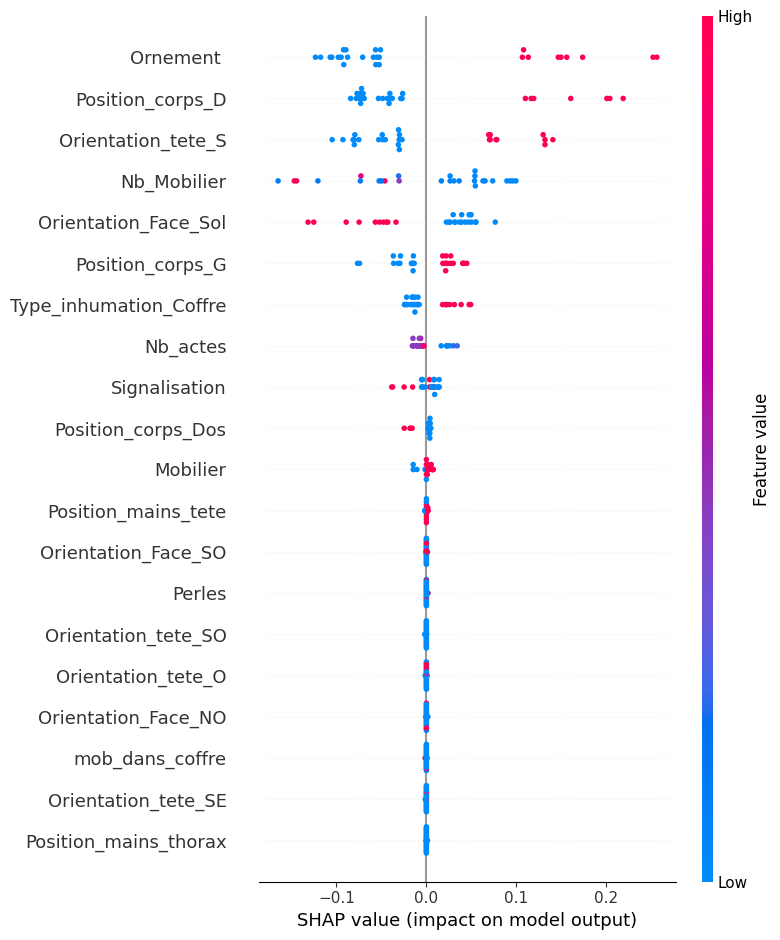

In [177]:
shap.initjs()
shap.summary_plot(shap_values[1], X)